# GOAL
<i>Using this data, how can we use features such as project category, currency, funding goal, and country to predict if a Kickstarter project will succeed?</i>

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Kickstarter Company Project
import pandas as pd
ks = pd.read_csv('D:/Feauture Engineering/4104_16930_compressed_ks-projects-201801.csv/ks-projects-201801.csv',
                 parse_dates=['deadline', 'launched'])
ks.head(6)

# Parase_date --> Create 2 extra Features

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


# BASELINING YOUR MODEL

In [93]:
# The state column shows the outcome in categories
print('Unique values in `state` column:', list(ks.state.unique()))

Unique values in `state` column: ['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']


## 1 .Prepare the target column

First we'll convert the state column into a target we can use in a model. <br>
Data cleaning isn't the current focus, so we'll simplify this example by:

- Dropping projects that are "live"
- Counting "successful" states as outcome = 1
- Combining every other state as outcome = 0

### 1.1 Drop live projects

In [94]:
# Drop live projects
ks = ks.query('state != "live"')

### 1.2 Create Outcome Column

In [95]:
# Add outcome column, "successful" == 1, others(rest) are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

In [96]:
ks.head (20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,outcome
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


## 2 Convert timestamps

Next, we convert the launched feature into categorical features we can use in a model.<br> Since we loaded the columns as timestamp data, we access date and time values through the .dt attribute on the timestamp column.

In [97]:
# Made Three Columns using .dt
ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

In [98]:
ks.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,outcome,hour,day,month,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0,12,11,8,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0,4,2,9,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0,0,12,1,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0,3,17,3,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0,8,4,7,2015
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1,13,26,2,2016
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1,18,1,12,2014
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0,20,1,2,2016
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0,18,24,4,2014
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0,21,11,7,2014


## 3 Prep categorical variables

<i>Now for the categorical variables -- category, currency, and country -- we'll need to convert them into integers so our model can use the data.</i>

<i><b> For this we'll use scikit-learn's LabelEncoder. This assigns an integer to each value of the categorical feature.</b></i>

### 3.1 Converting Categorical Features 

In [99]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = ks[cat_features].apply(encoder.fit_transform)

In [100]:
encoded.head(20)

,category,currency,country
0,108,5,9
1,93,13,22
2,93,13,22
3,90,13,22
4,55,13,22
5,123,13,22
6,58,13,22
7,41,13,22
8,113,13,22
9,39,13,22


## 4. Making New Data Frame 

In [101]:
# Since ks and encoded have the same index and I can easily join them
data = ks[['goal', 'hour', 'day', 'month', 'year', 'outcome']].join(encoded)

data.head()

,goal,hour,day,month,year,outcome,category,currency,country
0,1000.0,12,11,8,2015,0,108,5,9
1,30000.0,4,2,9,2017,0,93,13,22
2,45000.0,0,12,1,2013,0,93,13,22
3,5000.0,3,17,3,2012,0,90,13,22
4,19500.0,8,4,7,2015,0,55,13,22


## 5. Create training, validation, and test splits

We need to create data sets for training, validation, and testing. We'll use a fairly simple approach and split the data using slices. We'll use 10% of the data as a validation set, 10% for testing, and the other 80% for training.

In [102]:
valid_fraction = 0.1
valid_size = int(len(data) * valid_fraction)

train = data[:-2 * valid_size]
valid = data[-2 * valid_size:-valid_size]
test = data[-valid_size:]

<b>NOTE :</b><b><br>
    we'll be using a LightGBM model. This is a tree-based model that typically provides the best performance, even compared to XGBoost. It's also relatively fast to train.</b>

## 6. Train a Model

In [103]:
import lightgbm as lgb

feature_cols = train.columns.drop('outcome')

dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)

## 7. Make predictions & evaluate the model

In [104]:
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['outcome'], ypred)

print(f"Test AUC score: {score}")


Test AUC score: 0.747615303004287


# OTHER TYPES OF ENCODING
You are already familiar with the most basic encodings: one-hot encoding and label encoding. In this tutorial, you'll learn about count encoding, target encoding, and CatBoost encoding.

## 1. Count Encoding
Count encoding replaces each categorical value with the number of times it appears in the dataset. For example, if the value "GB" occured 10 times in the country feature, then each "GB" would be replaced with the number 10.

In [105]:
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test
def train_model(train, valid):
    feature_cols = train.columns.drop('outcome')

    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")

In [106]:
import category_encoders as ce
cat_features = ['category', 'currency', 'country']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_enc.fit_transform(ks[cat_features])
data = data.join(count_encoded.add_suffix("_count"))

# Train a model 
train, valid, test = get_data_splits(data)
train_model(train, valid)

Validation AUC score: 0.7486


<b>Adding the count encoding features increase the validation score from 0.7467 to 0.7486, only a slight improvement.</b>

## 2. Target Encoding

Target encoding replaces a categorical value with the average value of the target for that value of the feature. For example, given the country value "CA", you'd calculate the average outcome for all the rows with country == 'CA', around 0.28.

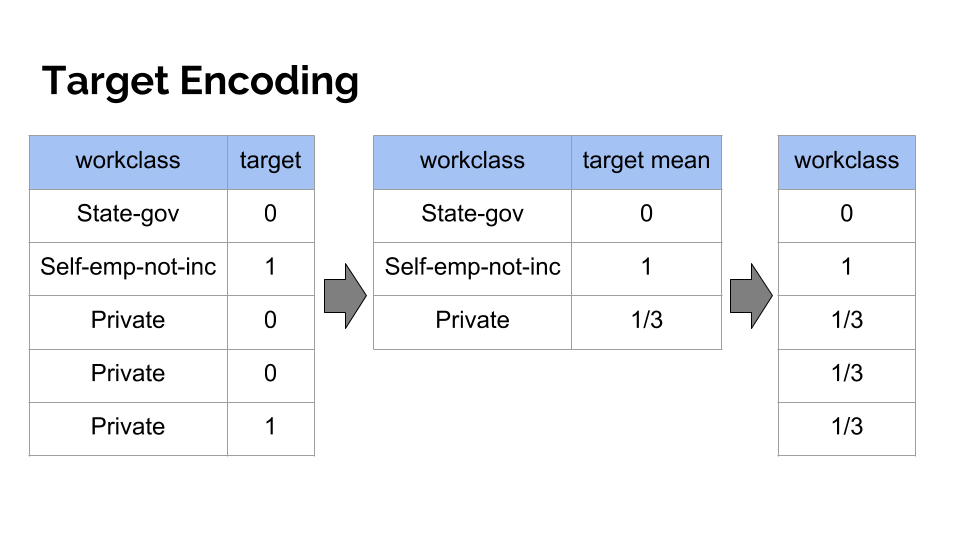

In [107]:
# Create the encoder
target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(train[cat_features], train['outcome'])

# Transform the features, rename the columns with _target suffix, and join to dataframe
train_TE = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid_TE = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

# Train a model
train_model(train_TE, valid_TE)

Validation AUC score: 0.7491


<b>The validation score is higher again, from 0.7467 to 0.7491.</b>

## 3. CatBoost Encoding

Finally, we'll look at CatBoost encoding. This is similar to target encoding in that it's based on the target probablity for a given value.

In [108]:
# Create the encoder
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit(train[cat_features], train['outcome'])

# Transform the features, rename columns with _cb suffix, and join to dataframe
train_CBE = train.join(target_enc.transform(train[cat_features]).add_suffix('_cb'))
valid_CBE = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_cb'))

# Train a model
train_model(train_CBE, valid_CBE)

Validation AUC score: 0.7492


<b>This does slightly better than target encoding.</b>

# FEATURE GENERATION

<b>Creating new features from the raw data is one of the best ways to improve your model. </b>

## 1 Interaction

<i>One of the easiest ways to create new features is by combining categorical variables. For example, if one record has the country "CA" and category "Music", you can create a new value "CA_Music". This is a new categorical feature that can provide information about correlations between categorical variables. This type of feature is typically called an interaction.

In general, you would build interaction features from all pairs of categorical features. You can make interactions from three or more features as well, but you'll tend to get diminishing returns.

Pandas lets us simply add string columns together like normal Python strings.</i>

In [109]:
interactions = ks['category'] + "_" + ks['country']
print(interactions.head(5))

0            Poetry_GB
1    Narrative Film_US
2    Narrative Film_US
3             Music_US
4      Film & Video_US
dtype: object


## 2. Label encode the interaction feature

In [110]:
label_enc = LabelEncoder()
data_interaction = data.assign(category_country=label_enc.fit_transform(interactions))
data_interaction.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_count,currency_count,country_count,category_country
0,1000.0,12,11,8,2015,0,108,5,9,1362,33853,33393,1900
1,30000.0,4,2,9,2017,0,93,13,22,5174,293624,290887,1630
2,45000.0,0,12,1,2013,0,93,13,22,5174,293624,290887,1630
3,5000.0,3,17,3,2012,0,90,13,22,15647,293624,290887,1595
4,19500.0,8,4,7,2015,0,55,13,22,10054,293624,290887,979


## 3. Transforming numerical features

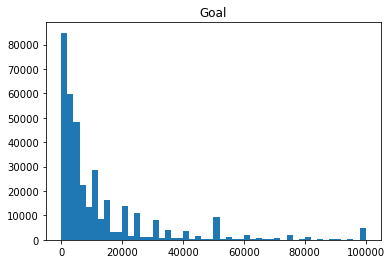

In [111]:
plt.hist(ks.goal, range=(0, 100000), bins=50);
plt.title('Goal');

<i><b>Some models work better when the features are normally distributed, so it might help to transform the goal values</b></i>

<i><b>Common choices for this are the (1).square root and (2).natural logarithm. These transformations can also help constrain outliers.</b></i>

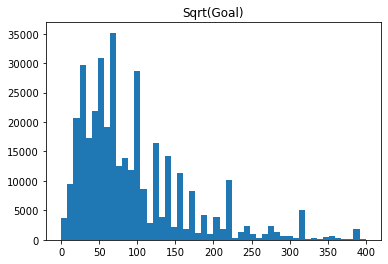

In [112]:
plt.hist(np.sqrt(ks.goal), range=(0, 400), bins=50);
plt.title('Sqrt(Goal)');

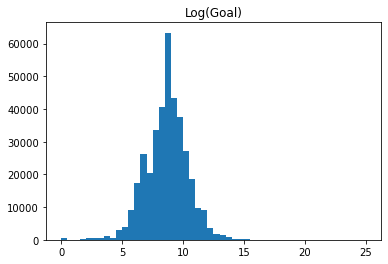

In [113]:
plt.hist(np.log(ks.goal), range=(0, 25), bins=50);
plt.title('Log(Goal)');

<b>NOTE</b> <br>
<b><i>The log transformation won't help our model since tree-based models are scale invariant. However, this should help if we had a linear model or neural network.</i></b>